In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GTA = False

In [3]:
metric_translations = {
    'rmse': 'RMSE (km$\cdot$s$^{-1}$)',
    'mae': 'MAE (km$\cdot$s$^{-1}$)',
    'corr': 'Pearson\'s correlation coefficient',
    'r2': 'R$^{2}$'
}

In [4]:
model = 'SVR'
model_file_name = 'svr'

if GTA:
    model = 'GTA'
    model_file_name = 'gta'

In [5]:
experimental_results_svr = pd.read_csv('results/performance_metrics_svr_1d_24d.csv', index_col=0)
experimental_results_elasticnet = pd.read_csv('results/performance_metrics_elasticnetAR_1d_24d.csv', index_col=0)

index = ['(1, 1)',
    '(1, 2)',
    '(1, 3)',
    '(1, 4)',
    '(2, 1)',
    '(2, 2)',
    '(2, 3)',
    '(2, 4)',
    '(3, 1)',
    '(3, 2)',
    '(3, 3)',
    '(3, 4)',
    '(4, 1)',
    '(4, 2)',
    '(4, 3)',
    '(4, 4)',
    '(5, 1)',
    '(5, 2)',
    '(5, 3)',
    '(5, 4)']

# Values extracted directly from Sun et al.'s work
rmse = [
        104.5,  86.0,   90.26,  91.34,
        69.65,  92.78,  100.65, 104.54,
        88.75,  96.71,  101.57, 100.76,
        104.17, 100.36, 100.87, 100.69,
        113.64, 99.9,   100.26, 97.76
]

mae = [
        80.94,  67.27,  71.90,  74.82,
        56.11,  77.09,  84.63,  82.07,
        76.75,  81.16,  85.29,  93.90,
        82.61,  85.50,  85.26,  84.13,
        99.67,  83.81,  85.26,  81.74
]

corr = [
        0.61,  0.54,   0.47,  0.45,
        0.74,  0.42,   0.20,  0.20,
        0.64,  0.34,   0.14,  0.17,
        0.13,  0.37,   0.27,  0.24,
        0.58,  0.26,   0.27,  0.33
]

d = {'1h_rmse': rmse, '1h_mae': mae, '1h_corr': corr}

experimental_results_gta = pd.DataFrame(d, index=index)

try:
    experimental_results_svr['1h_corr'] = experimental_results_svr['1h_corr'].apply(lambda x: eval(x)[0])
except:
    pass

try:
    experimental_results_elasticnet['1h_corr'] = experimental_results_elasticnet['1h_corr'].apply(lambda x: eval(x)[0])
except:
    pass

try:
    experimental_results_gta['1h_corr'] = experimental_results_gta['1h_corr'].apply(lambda x: eval(x)[0])
except:
    pass

experimental_results_elasticnet, experimental_results_svr, experimental_results_gta

(           1h_rmse     1h_mae     1h_mbe   1h_corr     1h_r2
 (1, 1)   71.614785  52.895104  -4.964471  0.759176  0.573276
 (1, 2)   94.794301  73.638114 -14.145079  0.520333  0.252336
 (1, 3)  104.658398  83.534280 -21.538209  0.362549  0.088640
 (1, 4)  108.522373  87.222960 -25.560908  0.279626  0.020103
 (2, 1)   69.262982  51.242819  -3.500762  0.776187  0.600843
 (2, 2)   89.424181  69.900604 -10.344867  0.588254  0.334648
 (2, 3)   97.125536  78.098053 -15.838324  0.494458  0.215110
 (2, 4)  100.369480  80.803520 -19.386986  0.451707  0.161805
 (3, 1)   68.905518  50.976320  -3.055032  0.778615  0.604952
 (3, 2)   86.540410  67.742102  -8.215416  0.621244  0.376868
 (3, 3)   92.162974  73.926483 -12.147999  0.564050  0.293268
 (3, 4)   94.200520  75.663918 -14.762609  0.546213  0.261674
 (4, 1)   68.904509  51.164506  -2.492271  0.778405  0.604964
 (4, 2)   86.308378  67.583314  -7.414489  0.622673  0.380206
 (4, 3)   91.144273  73.096338 -10.511430  0.573461  0.308805
 (4, 4) 

In [6]:
indices = experimental_results_elasticnet.index.values
indices

array(['(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(2, 1)', '(2, 2)',
       '(2, 3)', '(2, 4)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)',
       '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(5, 1)', '(5, 2)',
       '(5, 3)', '(5, 4)'], dtype=object)

In [7]:
x = []
y = []
for v in indices:
    xp, yp = eval(v)
    x.append(xp)
    y.append(yp)

x = np.array(x)
y = np.array(y)

In [8]:
aggregation = '1h'
metric = 'corr'
z = f'{aggregation}_{metric}'

In [9]:
markers = ['.', 'v', 's', '+', 'X']
styles = ['solid', 'dashed', 'dashdot', 'dashed']

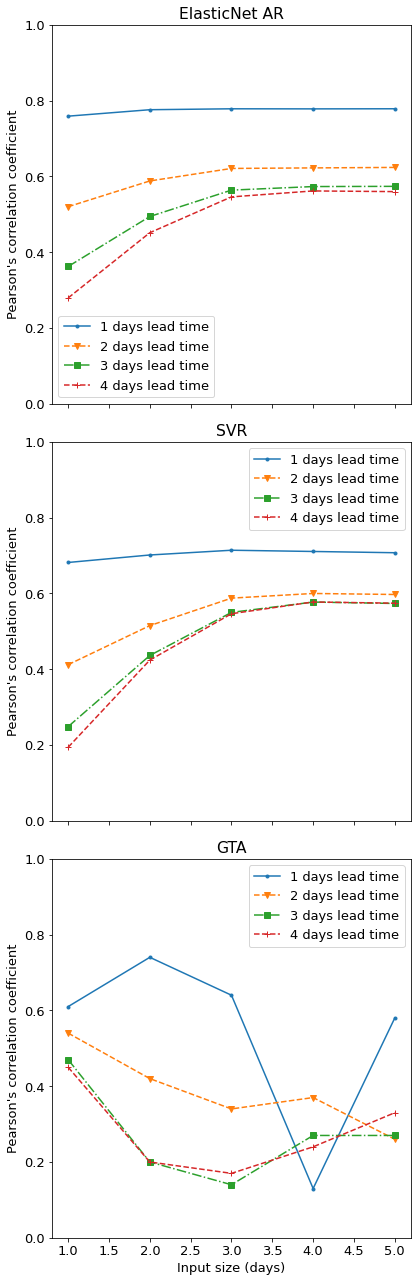

In [11]:
n_subplots = 3
side = 6

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(nrows=n_subplots, sharex=True, figsize=(side, n_subplots*side))

leg_labels = []

cur_style = 0

for lead in np.unique(y):
    indices = [f'({in_size}, {lead})' for in_size in np.unique(x)]
    ax[0].plot(np.unique(x), experimental_results_elasticnet[z][indices], linestyle=styles[cur_style],
            marker=markers[cur_style])
    leg_labels.append(f'{lead} days lead time')
    cur_style+=1

leg_labels = []

cur_style = 0

for lead in np.unique(y):
    indices = [f'({in_size}, {lead})' for in_size in np.unique(x)]
    ax[1].plot(np.unique(x), experimental_results_svr[z][indices], linestyle=styles[cur_style],
            marker=markers[cur_style])
    leg_labels.append(f'{lead} days lead time')
    cur_style+=1

leg_labels = []

cur_style = 0

for lead in np.unique(y):
    indices = [f'({in_size}, {lead})' for in_size in np.unique(x)]
    ax[2].plot(np.unique(x), experimental_results_gta[z][indices], linestyle=styles[cur_style],
            marker=markers[cur_style])
    leg_labels.append(f'{lead} days lead time')
    cur_style+=1

    
ax[0].set_title('ElasticNet AR')
ax[1].set_title('SVR')
ax[2].set_title('GTA')


ax[0].set_ylim(bottom=0, top=1)
ax[1].set_ylim(bottom=0, top=1)
ax[2].set_ylim(bottom=0, top=1)

plt.xlabel('Input size (days)')
ax[0].set_ylabel(f'{metric_translations[metric]}')
ax[1].set_ylabel(f'{metric_translations[metric]}')
ax[2].set_ylabel(f'{metric_translations[metric]}')
ax[0].legend(leg_labels)
ax[1].legend(leg_labels)
ax[2].legend(leg_labels)
#plt.title(f'{model}')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.savefig(f'figs/{metric}_{model_file_name}.png', bbox_inches='tight')
plt.show()